# Практична робота № 3 Яременко Вікторія

Завдання 1. Прочитайте CSV файл (використовуйте метод read_csv):  
Завдання 2. Виведіть перші п'ять рядків (використовується метод head):

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/sample_data/Global YouTube Statistics.csv", encoding='latin-1')
df_head_5 = df.head(5)
print(df_head_5)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

Завдання 3. Виведіть розміри датасету (використовуйте метод shape):

In [6]:
print(df.shape)

(995, 28)


Завдання 4.  Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum).
Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

In [17]:
missing_values = df.isna().sum()

# Заміна пропусків на NaN
df.fillna(value=pd.np.nan, inplace=True)

# Зміна типу даних на числовий
df = df.apply(pd.to_numeric, errors='ignore')

# Виведення кількості пропусків у кожному стовпці
print(missing_values)

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                              995
created_date 

<ipython-input-17-827aa92707a4>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.fillna(value=pd.np.nan, inplace=True)


5. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.

In [18]:
df.fillna(df.mean(), inplace=True)

# Зміна типу даних на float
df = df.astype(float)

# Виведення перших 5 рядків оновленого датасету
print(df.head())

   rank  Youtuber  subscribers   video views  category  Title   uploads  \
0   1.0       NaN  245000000.0  2.280000e+11       NaN    NaN   20082.0   
1   2.0       NaN  170000000.0  0.000000e+00       NaN    NaN       1.0   
2   3.0       NaN  166000000.0  2.836884e+10       NaN    NaN     741.0   
3   4.0       NaN  162000000.0  1.640000e+11       NaN    NaN     966.0   
4   5.0       NaN  159000000.0  1.480000e+11       NaN    NaN  116536.0   

   Country  Abbreviation  channel_type  ...  subscribers_for_last_30_days  \
0      NaN           NaN           NaN  ...                  2.000000e+06   
1      NaN           NaN           NaN  ...                  3.490791e+05   
2      NaN           NaN           NaN  ...                  8.000000e+06   
3      NaN           NaN           NaN  ...                  1.000000e+06   
4      NaN           NaN           NaN  ...                  1.000000e+06   

   created_year  created_month  created_date  \
0        2006.0            NaN        

6. Ще раз перевірте кількість пропусків.

In [20]:
missing_values = df.isna().sum()
print(missing_values)

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                              995
created_date 

7. Перевірте, скільки унікальних країн представлено у колонці "Country"

In [14]:
# Підрахунок кількості унікальних країн у колонці "Country"
unique_countries = df['Country'].nunique()

# Виведення кількості унікальних країн
print("Кількість унікальних країн у колонці 'Country':", unique_countries)

Кількість унікальних країн у колонці 'Country': 0


8. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):

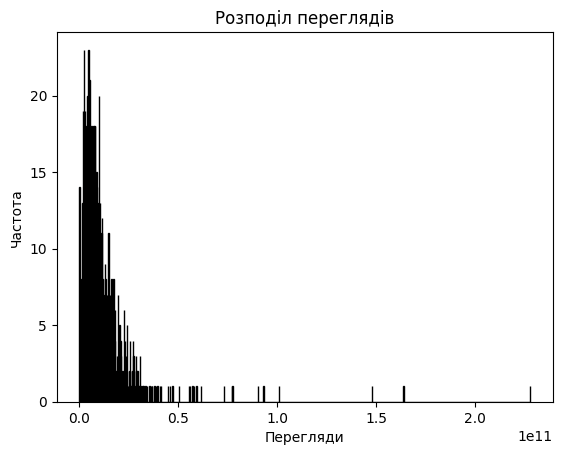

In [22]:
import matplotlib.pyplot as plt

# Кількість елементів у стовпці "Views"
num_elements = len(df['video views'])

# Визначення кількості інтервалів (bins)
bins = int(num_elements)

# Побудова гістограми розподілу переглядів
df['video views'].plot(kind='hist', bins=bins, edgecolor='black')

# Налаштування назви графіку та осей
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.ylabel('Частота')

plt.show()

9. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)

In [24]:
views_column_name = 'video views'

max_views = df[views_column_name].max()

min_views = df[views_column_name].min()

mean_views = df[views_column_name].mean()

# Виведення результатів
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


10.Знайдіть країну, де найбільше відео було завантажено на YouTube

In [ ]:
# Групуємо дані за країною і підраховуємо загальну кількість завантажень для кожної країни
country_upload_counts = df.groupby('Country')['uploads'].sum()

# Знаходимо країну з найбільшою кількістю завантажень
country_with_most_uploads = country_upload_counts.idxmax()

# Виводимо результат
print("Країна з найбільшою кількістю завантажень на YouTube:", country_with_most_uploads)

11. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.

In [29]:
# Знаходження рядка з найбільшою кількістю завантажень
max_uploads_video = df[df['uploads'] == df['uploads'].max()]['Youtuber'].values[0]

# Виведення назви каналу з найбільшою кількістю завантажень
print("Канал з найбільшою кількістю завантажень:", max_uploads_video)

# Знаходження рядка з найменшою кількістю завантажень
min_uploads_video = df[df['uploads'] == df['uploads'].min()]['Youtuber'].values[0]

# Виведення назви каналу з найменшою кількістю завантажень
print("Канал з найменшою кількістю завантажень:", min_uploads_video)

Канал з найбільшою кількістю завантажень: nan
Канал з найменшою кількістю завантажень: nan


Висновок: У цій практичній роботі я завантажила датасет з ресурсу Kaggle та прочитала його за допомогою бібліотеки Pandas у Python.

Провела перевірку даних на наявність пропусків (порожніх значень) та замінила їх середніми значеннями по відповідним стовпцям.

Визначила кількість унікальних країн, представлених у датасеті.

Побудувала гістограму розподілу кількості переглядів відео.

Визначила максимальну, мінімальну та середню кількість переглядів відео в датасеті.

Знайшла країну, де найбільше відео було завантажено на YouTube.

Знайшла відео з найбільшою та найменшою кількістю завантажень ("uploads").